In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib :
import seaborn as sns 
import datetime as dt


In [7]:
penguin = pd.read_csv("penguins_size.csv")

In [8]:
penguin

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
# Print data types of DataFrame :
penguin.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [11]:
# Print info of DataFrame :
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
# Print number of missing values :
penguin.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [13]:
penguin.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [14]:
penguin = penguin.dropna()

In [15]:
penguin.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [16]:
island_dist = penguin.groupby(['species', 'island']).size()
print("\n island of penguins")
print(island_dist)


 island of penguins
species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       120
dtype: int64


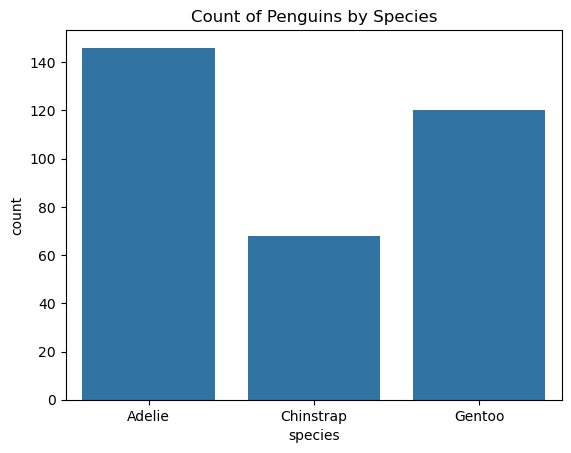

In [35]:
sns.countplot(data=penguin_clean, x="species")
plt.title("Count of Penguins by Species")
plt.show()

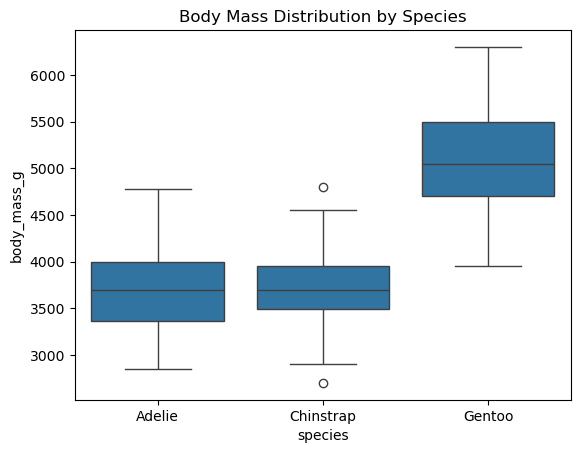

In [38]:
sns.boxplot(data=penguin_clean, x="species", y="body_mass_g")
plt.title("Body Mass Distribution by Species")
plt.show()

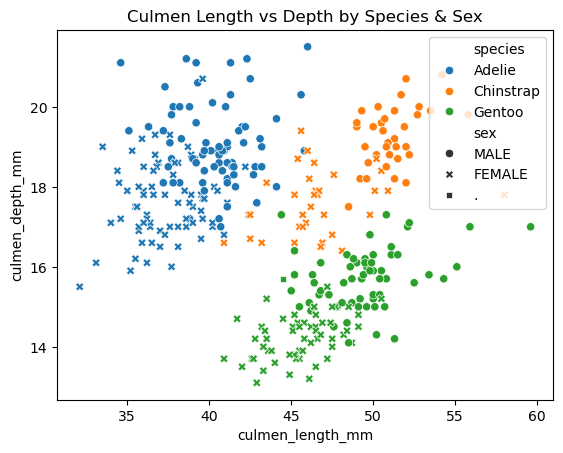

In [40]:
sns.scatterplot(data=penguin_clean, 
                x="culmen_length_mm", 
                y="culmen_depth_mm", 
                hue="species", 
                style="sex")
plt.title("Culmen Length vs Depth by Species & Sex")
plt.show()

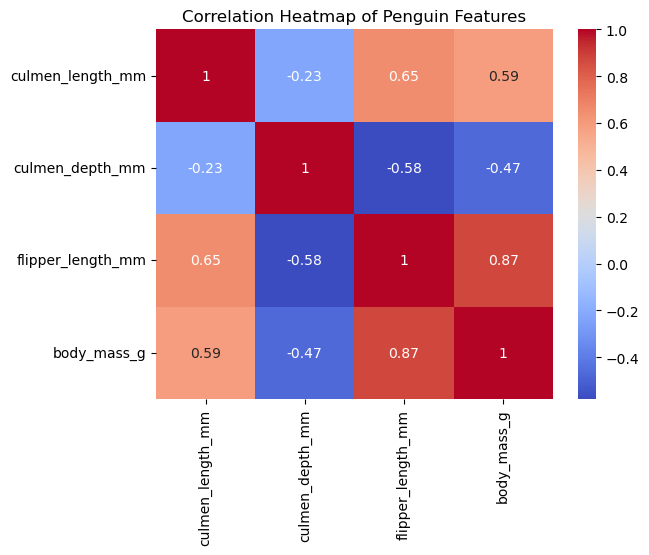

In [42]:
corr = penguin_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Penguin Features")
plt.show()

In [44]:
summary = penguin_clean.groupby("species")[["body_mass_g", "culmen_length_mm", "flipper_length_mm"]].mean()
print(summary)

           body_mass_g  culmen_length_mm  flipper_length_mm
species                                                    
Adelie     3706.164384         38.823973         190.102740
Chinstrap  3733.088235         48.833824         195.823529
Gentoo     5090.625000         47.542500         217.233333
